# Plot history

In this file, we are going to plot the results of our simulation.

We will perform the following actions:
* Plot the real values of the PDE function
* Plot the estimated PDE values generated using Monte Carlo simulation

Please run the following codes:

## Table of Content

- [1 - Packages](#1)
- [2 - Plotting the results of our simulation](#2)
    - [2.1 - Load the relevant csv files](#2-1)
    - [2.2 - Plot the PDE in one dimension: fix x in {2, 3, ..., 10} and varies t within [0, x-1]](#2-2)

<a name='1'></a>
## 1 - Packages

Run the cell below to import all the libraries you'll need:

In [1]:
# From system
import os
import shutil
from pathlib import Path
import random

# Data structure
import numpy as np
import pandas as pd
import json
import csv

# Plotting graph
from matplotlib import pyplot as plt

<a name='2'></a>
## 2 - Plotting the results of our simulation

<a name='2-1'></a>
### 2.1 - Load the relevant csv files

In [2]:
np_dictionary = {} 

dir_name = "results"
os_listdir = os.listdir(dir_name)
for file_name in os_listdir:
    file_path = os.path.join(dir_name, file_name)
    data =  pd.read_csv(file_path, delimiter=',', dtype=None, header=None)
    np_dictionary[file_name[:-4]] = data

<a name='2-2'></a>
### 2.2 - Plot the PDE simulated results

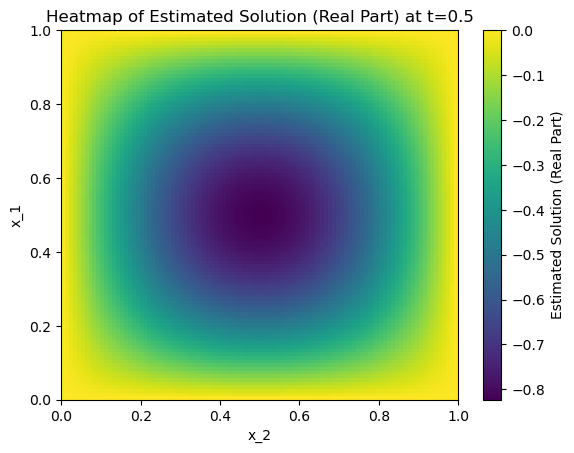

In [3]:
data_array = np_dictionary["monte_carlo_real"].to_numpy()
plt.imshow(data_array, extent=(0, 1, 0, 1), origin='lower', cmap='viridis', aspect='auto')
plt.colorbar(label='Estimated Solution (Real Part)')
plt.xlabel('x_2')
plt.ylabel('x_1')
plt.title('Heatmap of Estimated Solution (Real Part) at t=0.5')
plt.show()

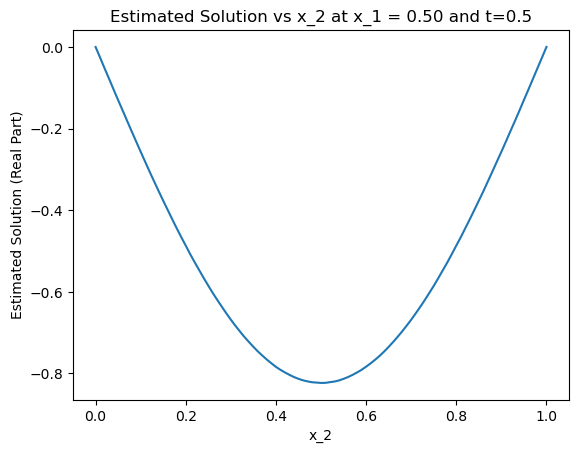

In [4]:
fixed_x1_index = 50  # Corresponds to x_1 = 0.50
estimated_solution_vs_x2 = data_array[fixed_x1_index, :]
x2_values = np.linspace(0, 1, data_array.shape[1])
plt.plot(x2_values, estimated_solution_vs_x2)
plt.xlabel('x_2')
plt.ylabel('Estimated Solution (Real Part)')
plt.title('Estimated Solution vs x_2 at x_1 = 0.50 and t=0.5')
plt.show()

<a name='3'></a>
## 3 - Finding the bound

We know that for $d=1$, the cubic nonlinear Klein-Gordon equation with a defocusing $+u^3$ term and a standard (positive-mass) $-u$ term
\begin{aligned}
\begin{cases}
    \partial_{tt}u(z,t)-(1)^2\Delta u(z,t) = -u(z,t) + (u(z,t))^3 \qquad (z,t) \in \mathbb{C}^2 \times (0,\infty) \\
    u(z,0) = \phi(z) = \sin(\pi z_1)\sin(\pi z_2)\\
    \partial_t u(z,0) = \psi(z) = -\sin(\pi z_1)\sin(\pi z_2)
\end{cases}
\end{aligned}

admits a classical solution on the interval $[0,t_0]$ if both sufficient conditions are satisfied:

1. $\phi, \psi \in C^2(\overline{B(z_0, t_0)})$
2. $e^{3t_0^2} -e^{t_0^2} <  \Big(2 \max (1  , \Vert \phi \Vert_{\infty, \overline{B(z_0, t_0)}} + t_0 \Vert \psi \Vert_{\infty, \overline{B(z_0, t_0)}} + t_0 \Vert \nabla\phi \Vert_{\infty, \overline{B(z_0, t_0)}} )^2
\Big)^{-1}$

where $\overline{B(z_0, t_0)}$ is the closed ball in $\mathbb{R}^2$ centered at $z_0 \in \mathbb{R}^2$.

Since our evaluation point is set at some $x=(x_1, x_2)$ where $x_1, x_2 \in \mathbb{R} \cap [0,1]$, it is natural that we take $z_0=x=(x_1, x_2)$. Condition 1 is satisfied so long as the set $\overline{B(x, t_0)}$ does not contain a pole. Our objective is to find the maximum $t_0$ such that Condition 2 is also satisfied.

Now we have 
$$
\phi(z) = \sin(\pi z_1)\sin(\pi z_2)
$$
and so naturally
$$
|\phi(z)|\le 1.
$$

Similarly,
$$
\psi(z) = -\sin(\pi z_1)\sin(\pi z_2)
$$
and so naturally
$$
|\psi(z)|\le 1.
$$

Lastly,
$$
\partial_{z_1}\phi(z) = \pi\cos(\pi z_1)\sin(\pi z_2), \qquad \partial_{z_2}\phi(z) = \pi\sin(\pi z_1)\cos(\pi z_2)
$$
and so naturally
$$
|\partial_{z_1}\phi(z)|\le \pi, \qquad |\partial_{z_2}\phi(z)|\le \pi,
$$
Thus, 
$$
|\nabla\phi| = \sqrt{|\partial_{z_1}\phi(z)|^2+|\partial_{z_1}\phi(z)|^2} \le \sqrt{2}\pi.
$$

Therefore, we are safe to conclude that 
$$
\Vert \phi \Vert_{\infty, \overline{B(x,t_0)}}, \Vert \phi \Vert_{\infty, \overline{B(x,t_0)}} \le 1, \qquad \Vert \nabla\phi \Vert_{\infty, \overline{B(x,t_0)}} \le \sqrt{2}\pi.
$$

Remember our overall objective is to determine the $t_0$ such that 
$$
e^{3t_0^2} -e^{t_0^2} <  \Biggl(2 \max\Big(1, \Vert \phi \Vert_{\infty, \overline{B(x,t_0)}} + t_0 \Vert \psi \Vert_{\infty, \overline{B(x,t_0)}} + t_0 \Vert \nabla\phi \Vert_{\infty, \overline{B(x,t_0)}} \Big)^2
\Biggl)^{-1}
$$
is satisfied.

Now if 
$$
e^{3t_0^2} -e^{t_0^2} <  \Biggl(2 \max\Big(1, 1 + t_0 + t_0 \sqrt{2}\pi \Big)^2
\Biggl)^{-1}
$$
is satisfied, then the above objective is also satisfied. 

Thus, we can define our objective as finding the maximum $t_0$ such that 
$$
e^{3t_0^2} -e^{t_0^2} - \Biggl(2 \max\Big(1, 1 + t_0 + t_0 \sqrt{2}\pi \Big)^2 \Biggl)^{-1} < 0
$$
is satisfied


Maximum t_0 value found: 0.2180101


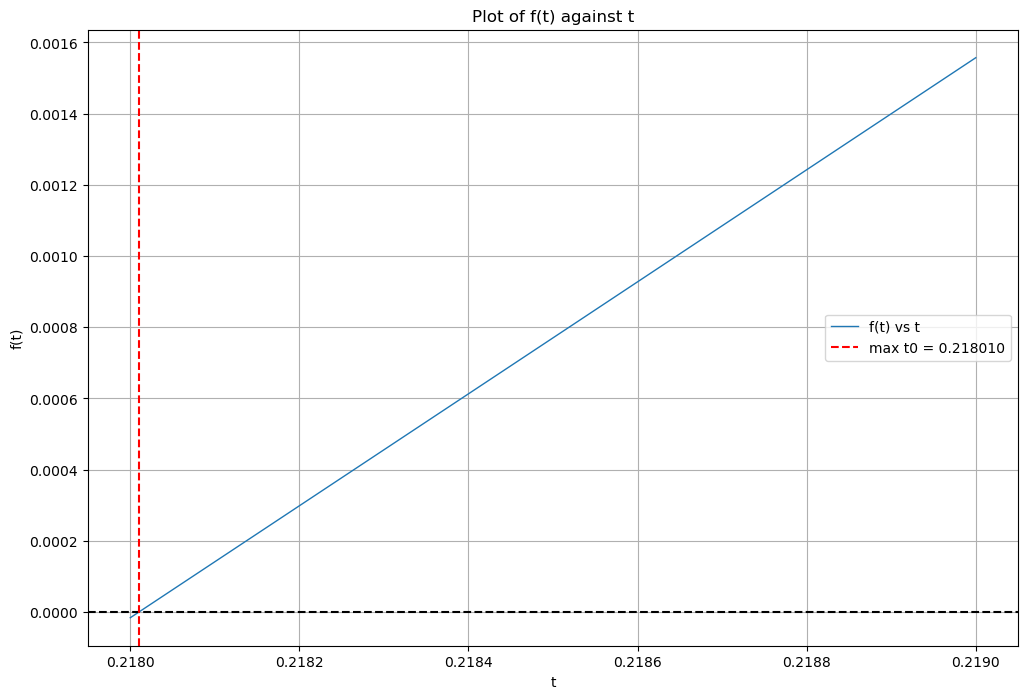

In [5]:
import math
import numpy as np

def bounds_func(t):
    return 1 + t + t * math.sqrt(2) * math.pi

def f(t):
    # t is a float scalar; phi_bound and psi_bound are expected to be defined earlier
    return math.exp(3*t**2) - math.exp(t**2) - 1.0/(2*max(1, bounds_func(t))**2)

def generate_T_vector(start=0.0, stop=0.2, steps=10001):
    """Generate a 1D array of t values from start to stop (inclusive) with 'steps' samples."""
    return np.linspace(start, stop, num=steps)

# --- User-adjustable parameters ---
start = 0.218
stop = 0.219
steps = 10001  # e.g. 10001 points gives step size 2e-5 over [0,0.2]

# Build T_vector and evaluate f(t)
T_vector = generate_T_vector(start, stop, steps)
i_values = np.array([f(float(t)) for t in T_vector])

# Find t values where f(t) < 0 and pick the maximum t (largest t that still satisfies the inequality)
valid_mask = i_values < 0
if not np.any(valid_mask):
    print('No t in the chosen range satisfies f(t) < 0')
    max_t_value = None
else:
    max_t_value = float(T_vector[valid_mask].max())
    print('Maximum t_0 value found:', max_t_value)

# Plot i_values against T_vector with a marker for the found maximum t0 (if any)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(T_vector, i_values, label='f(t) vs t', lw=1)
plt.xlabel('t')
plt.ylabel('f(t)')
plt.title('Plot of f(t) against t')
plt.axhline(0, color='k', linestyle='--')
if max_t_value is not None:
    plt.axvline(max_t_value, color='red', linestyle='--', label=f'max t0 = {max_t_value:.6f}')
plt.legend()
plt.grid(True)
plt.show()